<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/bs_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (438/438), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 438 (delta 245), reused 52 (delta 16), pack-reused 0
Receiving objects: 100% (438/438), 508.88 KiB | 9.79 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import numpy as np

In [ ]:
def dfs(G, u, t, visited):
  visited[u] = True
  if u == t:
    return [u], np.Inf
  else:
    n = len(G)
    for v in range(n):
      if G[u][v] > 0 and not visited[v]:
        path, mind = dfs(G, v, t, visited)
        if path != None:
          return [u] + path, mind if mind < G[u, v] else G[u, v]

    return None, 0

In [ ]:
def fordFulkerson(G, s, t):
  n = len(G)
  Gres = G.copy()
  Gflow = np.zeros((n, n))
  
  while True:
    path, bottleneck = dfs(Gres, s, t, [False]*n)

    if path != None:
      for i in range(1, len(path)):
        u = path[i - 1]
        v = path[i]
        Gres[u][v] -= bottleneck
        Gres[v][u] += bottleneck
        Gflow[u][v] = Gflow[u][v] - Gflow[v][u] + bottleneck
    else:
      break

  return Gflow, np.sum(Gflow[s])

Node | Number
-- | --
S | 0
a | 1
b | 2
c | 3
d | 4
t | 5

In [ ]:
%%file 1.adjmatrix
0 16  0 13  0  0
0  0 12 10  0  0
0  0  0  9  0 20
0  4  0  0 14  0
0  0  7  0  0  4 
0  0  0  0  0  0

Writing 1.adjmatrix


In [ ]:
G = np.fromfile("1.adjmatrix", sep=" ").reshape((6, 6))
G

array([[ 0., 16.,  0., 13.,  0.,  0.],
       [ 0.,  0., 12., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  0., 20.],
       [ 0.,  4.,  0.,  0., 14.,  0.],
       [ 0.,  0.,  7.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

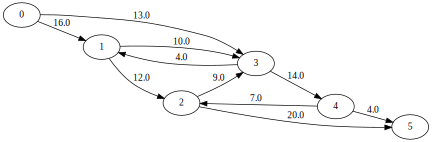

In [ ]:
Gnx = nx.from_numpy_matrix(G, create_using=nx.DiGraph)
gs.nx2gv(Gnx, weighted=True)

In [ ]:
dfs(G, 0, 5, [False]*6)

([0, 1, 2, 3, 4, 5], 4.0)

23.0


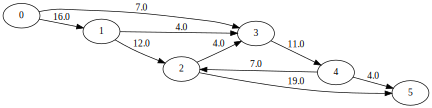

In [ ]:
Gf, fm = fordFulkerson(G, 0, 5)
print(fm)
Gnx = nx.from_numpy_matrix(Gf, create_using=nx.DiGraph)
gs.nx2gv(Gnx, weighted=True)